In [5]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 10)

# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

## 1. Create a 4 dimensional data set with 64 elements and show all 4 scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$,  $x_3$ vs. $y$, $x_4$ vs. $y$

In [6]:
n = int(64/4)
x = np.linspace(0, 1, n) + np.random.rand(4, n)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0, 1, n) + np.random.rand(n) - 1

In [7]:
pd.DataFrame(x, y)

,0,1,2,3,4
-0.836041,0.940733,0.174992,0.629254,0.235567,1.0
-0.242539,0.360513,0.136299,0.705995,0.568749,1.0
-0.222051,0.313123,0.255241,0.431031,0.387549,1.0
-0.559784,0.942641,0.250852,0.320958,0.328561,1.0
0.161295,0.784844,0.672503,0.946416,0.809694,1.0
-0.331562,0.355966,0.479119,0.388940,0.444534,1.0
-0.543403,0.908298,1.024093,0.576247,1.314510,1.0
-0.086446,1.173022,1.102176,0.472761,0.848591,1.0
0.353186,1.370289,0.858899,0.670475,1.405373,1.0
0.257652,1.246506,0.874137,0.681638,0.603165,1.0


Text(0.5, 1.0, 'Plot 1')

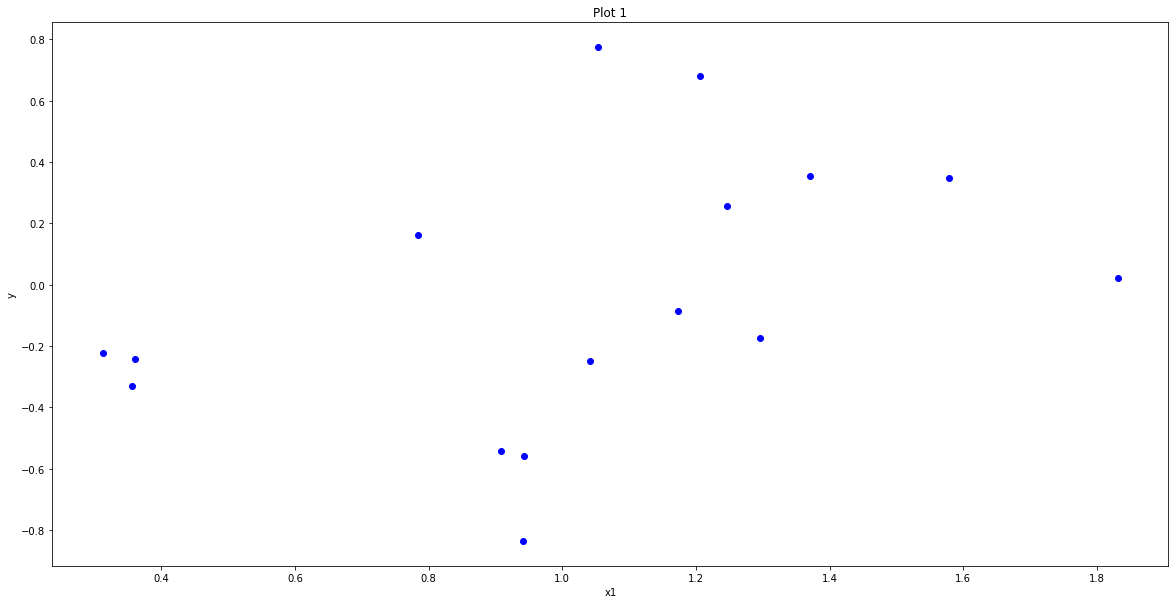

In [8]:
plt.scatter(x.T[0], y, c = "blue")
plt.xlabel("x1")
plt.ylabel("y")
plt.title("Plot 1")

Text(0.5, 1.0, 'Plot 2')

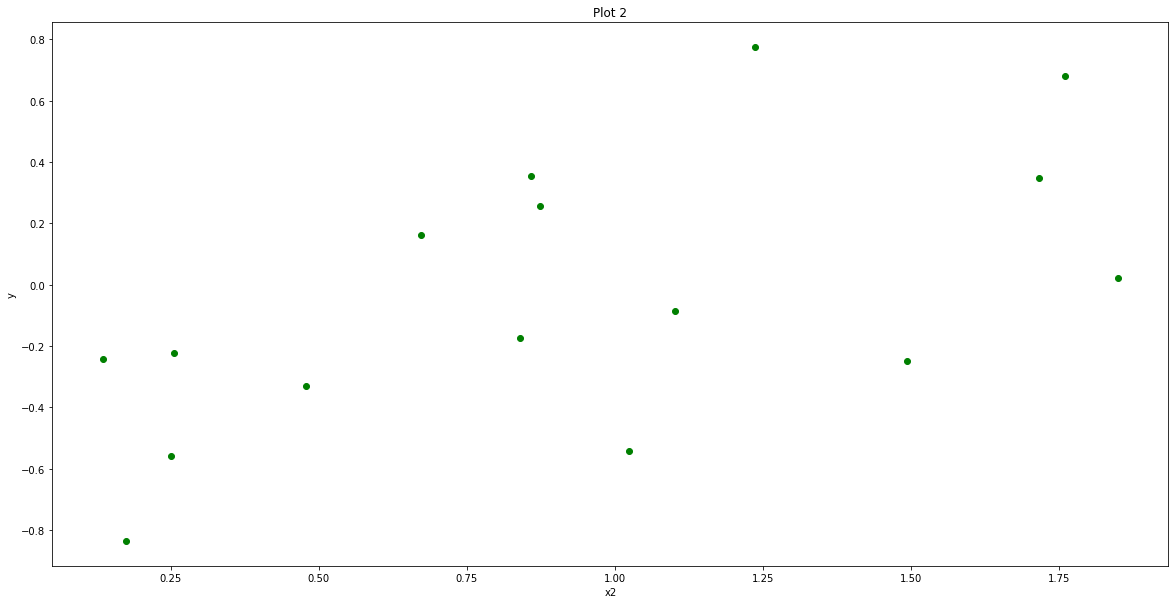

In [9]:
plt.scatter(x.T[1], y, c = "green")
plt.xlabel("x2")
plt.ylabel("y")
plt.title("Plot 2")

Text(0.5, 1.0, 'Plot 3')

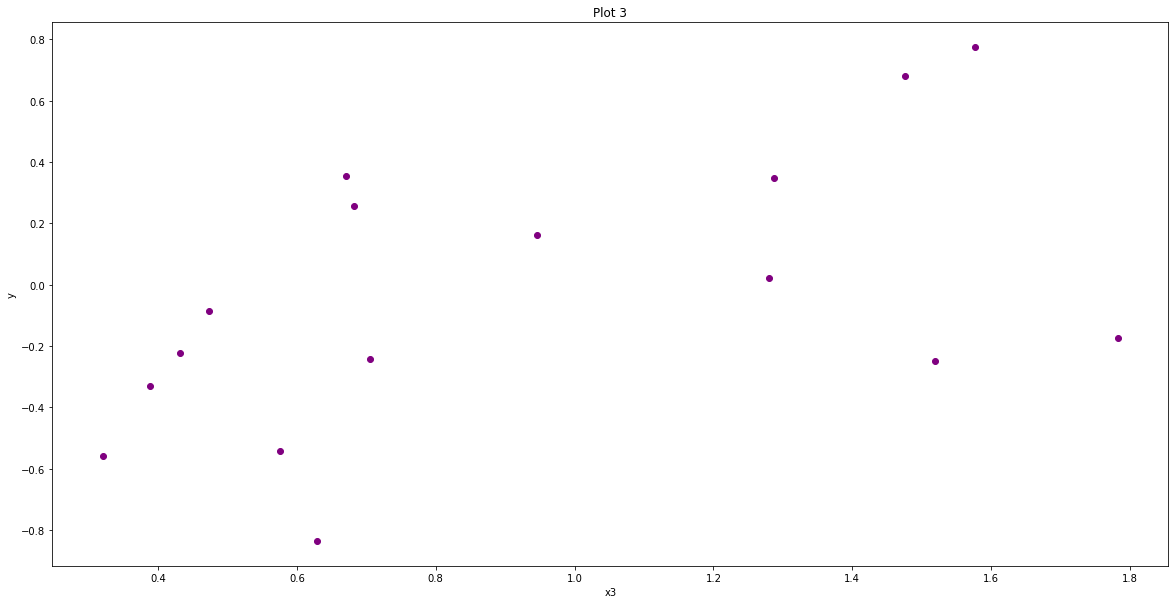

In [10]:
plt.scatter(x.T[2], y, c = "purple")
plt.xlabel("x3")
plt.ylabel("y")
plt.title("Plot 3")

Text(0.5, 1.0, 'Plot 4')

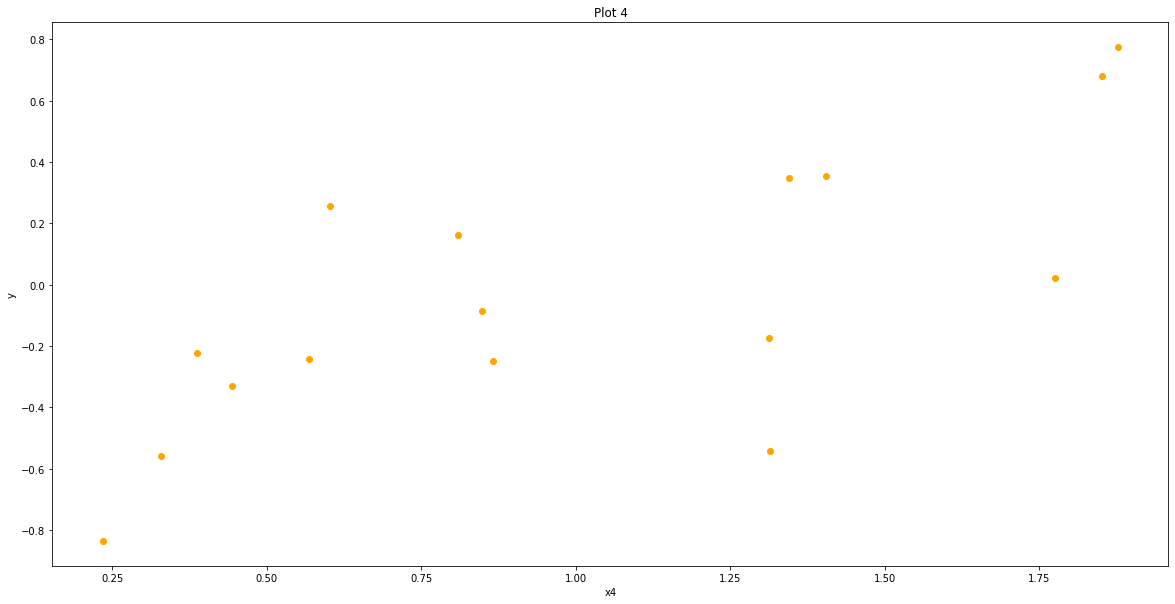

In [11]:
plt.scatter(x.T[3], y, c= "orange")
plt.xlabel("x4")
plt.ylabel("y")
plt.title("Plot 4")

## 2.  Create a Linear Regression model (like we did in class) to fit the data. *Use the example from Lesson 3 and do not use a library that calculates automatically*. We are expecting 5 coefficients to describe the linear model. 

## After creating the model (finding the coefficients), create a new column $y_p=\Sigma\beta_n\cdot x_n$ 

In [12]:
left = np.linalg.inv(np.dot(x.T, x))
right = np.dot(y.T, x)

In [13]:
beta = np.dot(left, right)
beta

array([-0.17965133,  0.13536298,  0.03086485,  0.52199492, -0.53048971])

In [14]:
pred = np.dot(x, beta)

## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

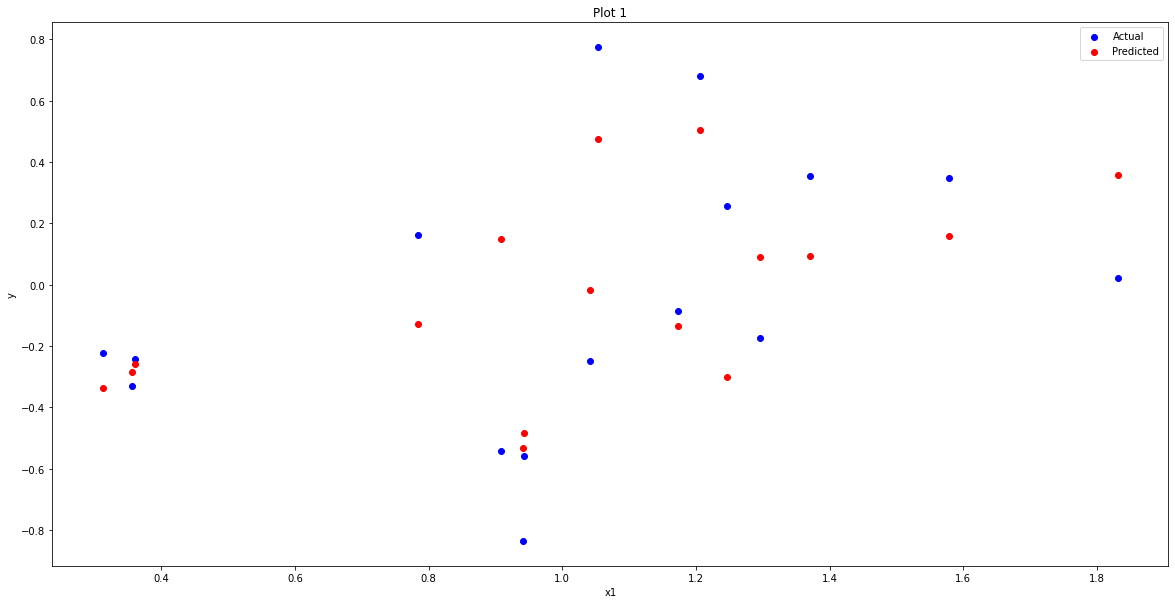

In [15]:
plt.scatter(x.T[0], y, c = "blue")
plt.scatter(x.T[0], pred, c="red")
plt.xlabel("x1")
plt.ylabel("y")
plt.title("Plot 1")
plt.legend(labels = ["Actual", "Predicted"])

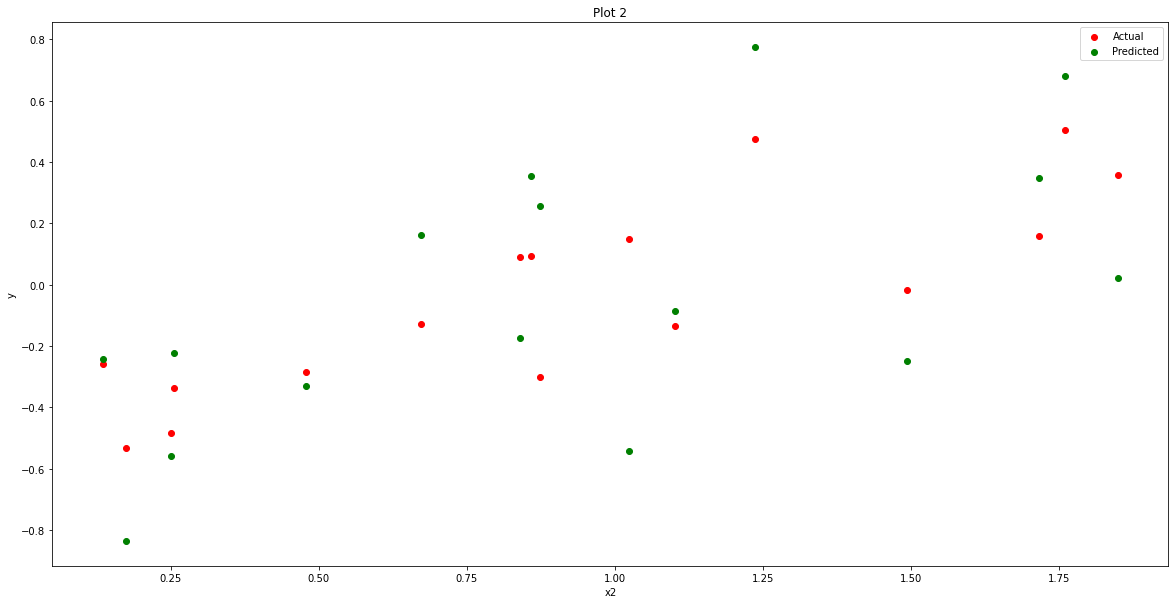

In [16]:
plt.scatter(x.T[1], pred, c="red")
plt.scatter(x.T[1], y, c="green")
plt.xlabel("x2")
plt.ylabel("y")
plt.title("Plot 2")
plt.legend(labels = ["Actual", "Predicted"])

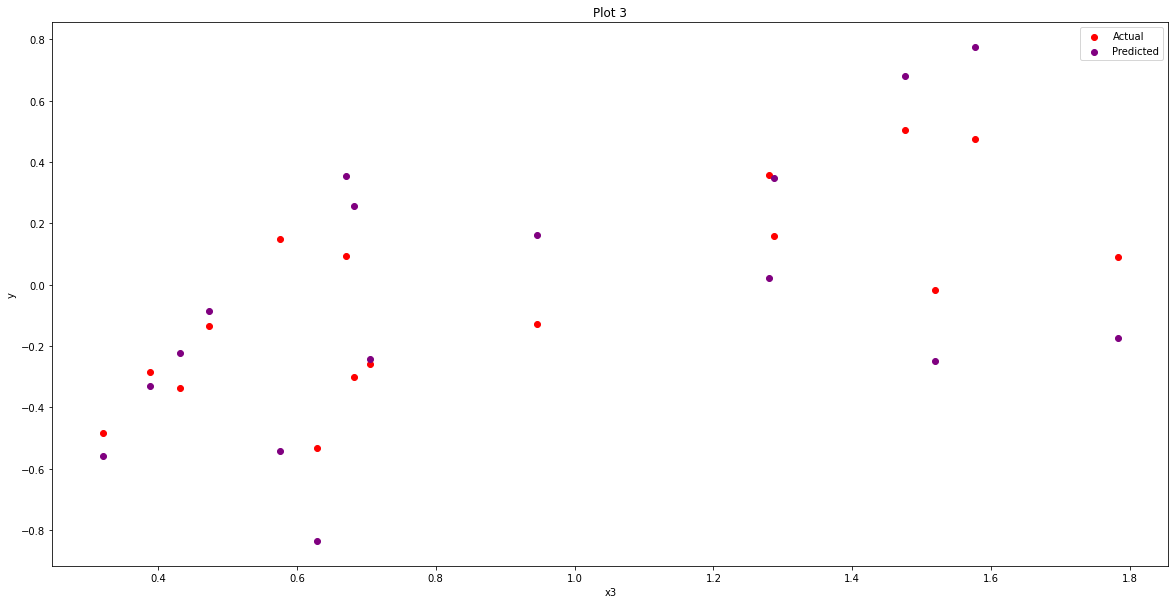

In [17]:
plt.scatter(x.T[2], pred, c="red")
plt.scatter(x.T[2], y, c="purple")
plt.xlabel("x3")
plt.ylabel("y")
plt.title("Plot 3")
plt.legend(labels = ["Actual", "Predicted"])

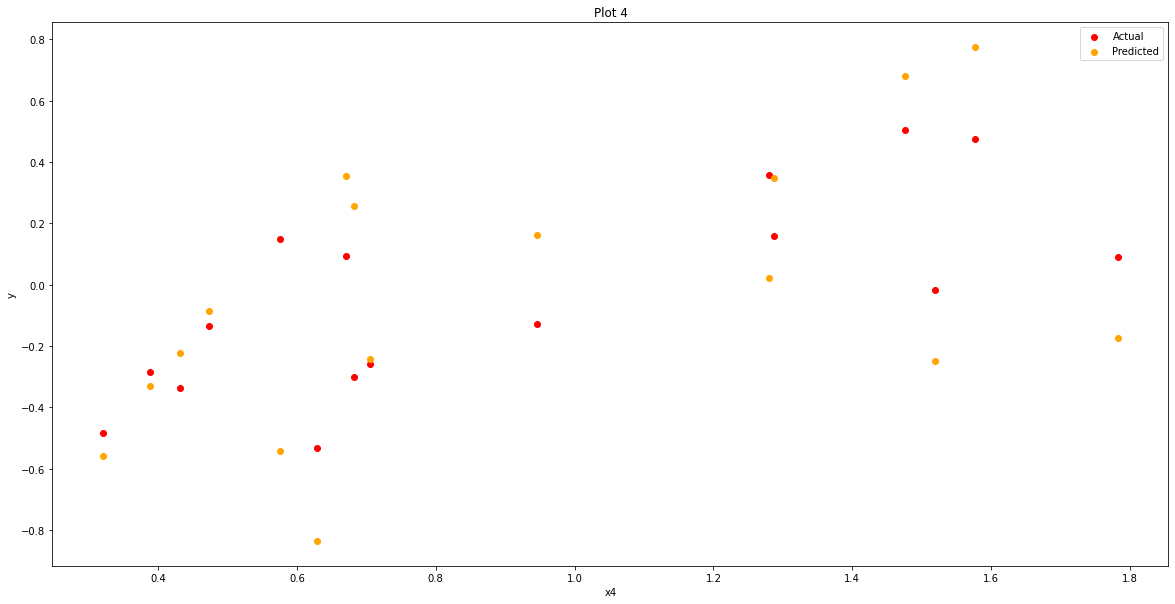

In [18]:
plt.scatter(x.T[2], pred, c="red")
plt.scatter(x.T[2], y, c="orange")
plt.xlabel("x4")
plt.ylabel("y")
plt.title("Plot 4")
plt.legend(labels = ["Actual", "Predicted"])

## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating (Column `Rating`)

In [19]:
import pandas as pd
import numpy as np
credit = pd.read_csv('../data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [20]:
credit.dtypes

Unnamed: 0      int64
Income        float64
Limit           int64
Rating          int64
Cards           int64
Age             int64
Education       int64
Gender         object
Student        object
Married        object
Ethnicity      object
Balance         int64
dtype: object

## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [21]:
non_numeric = ["Unnamed: 0", "Gender", "Student", "Married", "Ethnicity"]
cred = credit.copy().drop(non_numeric, axis = 1)
cred.head()

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331


In [22]:
xC = cred.drop("Rating", axis = 1)
yC = cred["Rating"]

In [23]:
beta = np.linalg.lstsq(xC, yC, rcond=None)[0]
pred = np.dot(xC, beta)
cred["pred"] = pred
cred.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,pred
0,14.891,3606,283,2,34,11,333,268.275784
1,106.025,6645,483,3,82,15,903,486.660454
2,104.593,7075,514,4,71,11,580,518.484791
3,148.924,9504,681,3,36,11,964,671.713620
4,55.882,4897,357,2,68,16,331,363.230731


In [24]:
beta

array([-1.47352977e-02,  6.79727002e-02,  5.99978634e+00,  1.19201683e-01,
        7.49574070e-01, -2.73902251e-03])

In [25]:
from sklearn.metrics import mean_squared_error
y_true = cred["Rating"]
y_pred = cred["pred"]
mean_squared_error(y_true, y_pred)

122.83382069475256

### 5. Plot your results using scatter plots (just like in class). Show as many of your columns vs. credit rating that you can.

Text(0.5, 1.0, 'Credit Rating Predicted by Income')

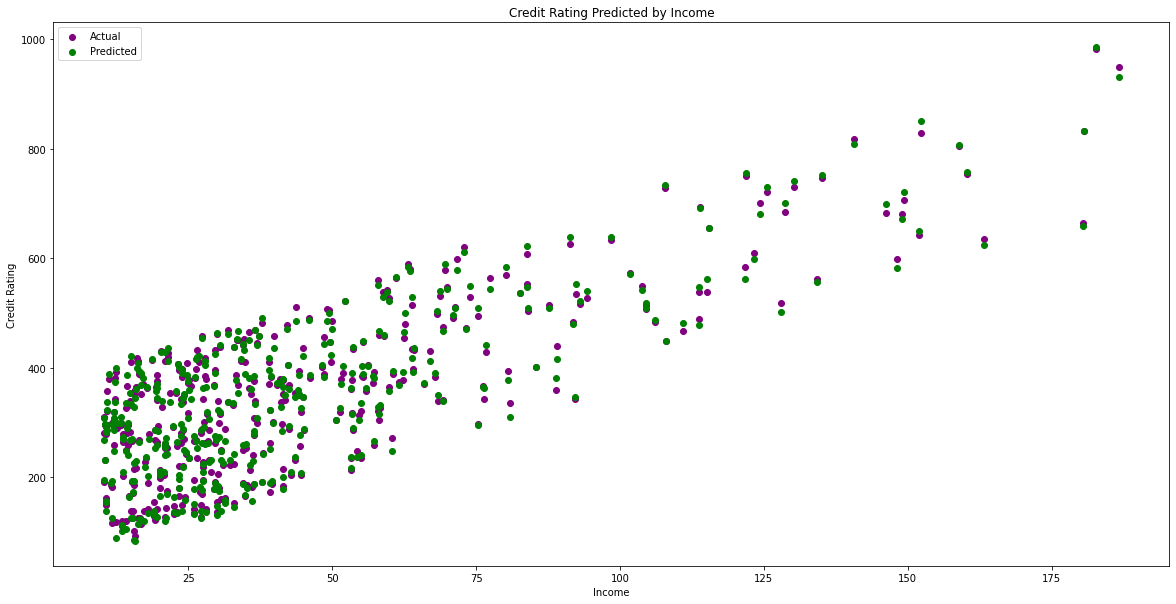

In [26]:
plt.scatter(cred["Income"], cred["Rating"], c = "purple")
plt.scatter(cred["Income"], cred["pred"], c = "green")
plt.xlabel("Income")
plt.ylabel("Credit Rating")
plt.legend(labels = ["Actual", "Predicted"])
plt.title("Credit Rating Predicted by Income")

Text(0.5, 1.0, 'Credit Rating Predicted by Limit')

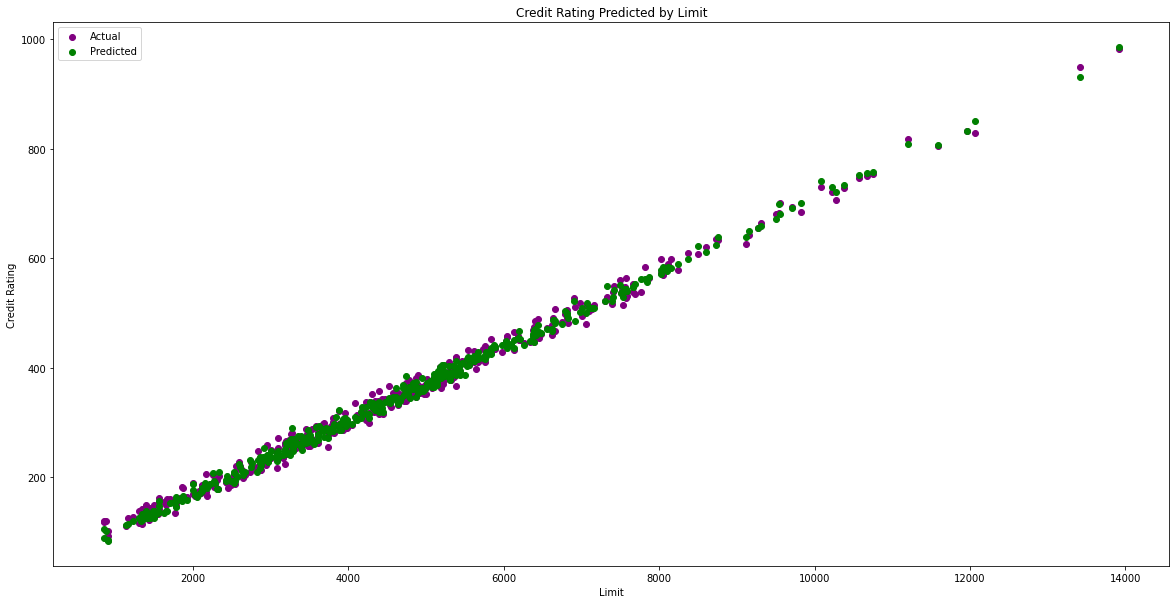

In [27]:
plt.scatter(cred["Limit"], cred["Rating"], c = "purple")
plt.scatter(cred["Limit"], cred["pred"], c = "green")
plt.xlabel("Limit")
plt.ylabel("Credit Rating")
plt.legend(labels = ["Actual", "Predicted"])
plt.title("Credit Rating Predicted by Limit")

Text(0.5, 1.0, 'Credit Rating Predicted by Age')

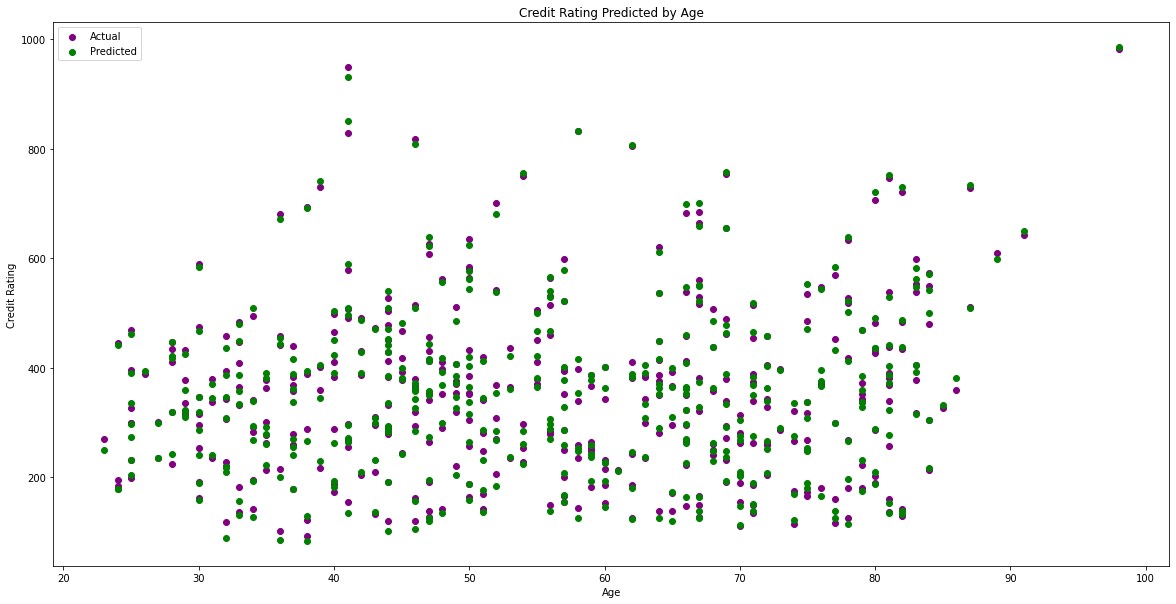

In [28]:
plt.scatter(cred["Age"], cred["Rating"], c = "purple")
plt.scatter(cred["Age"], cred["pred"], c = "green")
plt.xlabel("Age")
plt.ylabel("Credit Rating")
plt.legend(labels = ["Actual", "Predicted"])
plt.title("Credit Rating Predicted by Age")

Text(0.5, 1.0, 'Credit Rating Predicted by Balances')

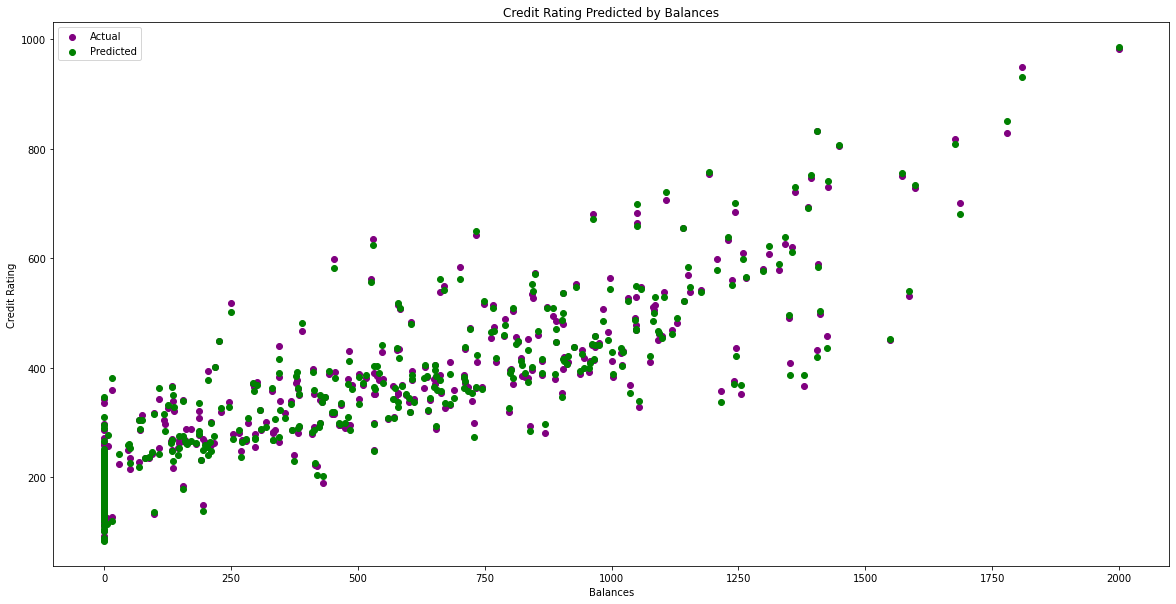

In [29]:
plt.scatter(cred["Balance"], cred["Rating"], c = "purple")
plt.scatter(cred["Balance"], cred["pred"], c = "green")
plt.xlabel("Balances")
plt.ylabel("Credit Rating")
plt.legend(labels = ["Actual", "Predicted"])
plt.title("Credit Rating Predicted by Balances")